# PA 2: Classification - Decision Tree

## --> Dataset information
Load dataset_DT.csv<br>
The data is ordered by date (day, month)<br>
### Features:
* age           --> age
* job           --> type of Job
* marital       --> marital status 
* education     --> highest education finished  
* default       --> already has credit in default? 
* balance       --> account balance 
* housing       --> taken housing loan?
* loan          --> taken personal loan?
* contact       --> communication via...
* day           --> day of last contact  
* month         --> month of last contact 
* duration      --> duration of last contact 
* campaign      --> number of contacts made to the client during the campaign 
* pdays         --> number of days that passed by after the client was last contacted from a previous campaign (999 means client wasn't previously contacted) 
* previous      --> number of contacts performed before this campaign and for this client
* poutcome      --> outcome of the previous marketing campaign
### Target variable:
* y --> has the client subscribed a term deposit?


## --> Programming Assignment Details

1) For this assignment use Jupyter notebook

2) You can use libraries: Numpy, Pandas, Scikit-learn, Matplotlib and Seaborn

3) Make sure to write about 2-3 lines to explain any kind of visualization

4) Do not to forget to cite any external sources used by you.


### Hints - 

1) Apart from null values, the dataset consists of "unknown" (string) values in multiple columns. You need to handle them as a part of null values.

1) To compress the data, numerous columns might be combined into one feature. There might even be columns with redundant data, i.e., information from a column might also be available from another column. If there are such columns, you can drop them. 

2) Categorized Data is preferable for decision trees.  If needed, figure out how to convert continuous feature to categorical and implement it.

3) Unwanted data can reduce the model's accuracy.

## Tasks

* Import the libraries and load the dataset (from the csv file) [5 points]

* Pre-process the dataset and provide a detailed explanation.  [25 points]

* Perform 2 visualizations of the features with respect to target variable with detailed explanation. [15 points]

* Determine Six most influential attributes on target attribute (with explanation). You do not necessarily need to drop the remaining features for the Decision Tree Classifier. Your task is just to determine and show the <b><i>Six</i></b> most influential attributes with detailed explanation. [10 points]

* Split your dataset 75% for training, and 25% for testing the classifier. [2 points]

* Use gini and entropy (play around with max_depth and min_samples_leaf parameters) to measure the quality of a split.  [5 points]

* Use comments to explain your code and variable names. [3 points]

* Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support) for both criteria. [20 points]

* Compare the results of the classifier using gini and entropy [5 points]

* Print the decision tree visualization with depth of 5 [5 points]

## <i>Note:</i>
#### There is no separate report for Decision Tree. Hence, you are required to explain your work for all the aforementioned tasks in the markdown cells in Jupyter notebook and through comments.

# Begin your code from here

### Task 1: Import the Libraries and load the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('dataset_DT.csv')
print(data.head())

    age          job   marital  education default  balance housing loan  \
0  34.0  blue-collar    single  secondary      no  13408.0      no   no   
1  49.0   management  divorced   tertiary      no  20727.0      no   no   
2  32.0     services    single   tertiary      no   1743.0     yes   no   
3  46.0   management  divorced   tertiary      no  10469.0     yes   no   
4  26.0   management    single   tertiary      no   7628.0      no   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular  1.0   apr     647.0       2.0   -1.0       0.0  unknown  no  
1  cellular  1.0   apr     285.0       3.0  132.0       2.0  failure  no  
2  cellular  1.0   apr    1156.0       1.0  261.0       3.0    other  no  
3  cellular  1.0   apr     202.0       2.0   -1.0       0.0  unknown  no  
4  cellular  1.0   apr     263.0       1.0   -1.0       0.0  unknown  no  


In [3]:
print(data.describe())

                age        balance           day      duration      campaign  \
count  18423.000000   18423.000000  18117.000000  18423.000000  18423.000000   
mean      40.952451    1849.616403     15.252525    411.779569      2.279433   
std       11.458720    3742.556247      8.085925    323.241660      1.981642   
min       18.000000   -3372.000000      1.000000      5.000000      1.000000   
25%       32.000000     206.000000      8.000000    192.000000      1.000000   
50%       38.000000     718.000000     15.000000    316.000000      2.000000   
75%       49.000000    2116.500000     21.000000    533.000000      3.000000   
max       95.000000  102127.000000     31.000000   3881.000000     55.000000   

              pdays      previous  
count  18423.000000  18423.000000  
mean      57.421213      0.875970  
std      112.455326      2.226526  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       91.000000      1.

### Task 2:  Pre-process the dataset and provide a detailed explanation

In [4]:
# Replace "unknown" values with NaN
print(data.shape)
modifiedData = data.replace('unknown', np.nan)
print(modifiedData.head())

(18423, 17)
    age          job   marital  education default  balance housing loan  \
0  34.0  blue-collar    single  secondary      no  13408.0      no   no   
1  49.0   management  divorced   tertiary      no  20727.0      no   no   
2  32.0     services    single   tertiary      no   1743.0     yes   no   
3  46.0   management  divorced   tertiary      no  10469.0     yes   no   
4  26.0   management    single   tertiary      no   7628.0      no   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular  1.0   apr     647.0       2.0   -1.0       0.0      NaN  no  
1  cellular  1.0   apr     285.0       3.0  132.0       2.0  failure  no  
2  cellular  1.0   apr    1156.0       1.0  261.0       3.0    other  no  
3  cellular  1.0   apr     202.0       2.0   -1.0       0.0      NaN  no  
4  cellular  1.0   apr     263.0       1.0   -1.0       0.0      NaN  no  


In [5]:
# Finding the null and nan values
modifiedData=modifiedData.dropna()
print(modifiedData.shape)
print(data.isna().shape)

(4650, 17)
(18423, 17)


In [6]:
print(data.head())
print(data.isnull().sum())
print(data.shape)

    age          job   marital  education default  balance housing loan  \
0  34.0  blue-collar    single  secondary      no  13408.0      no   no   
1  49.0   management  divorced   tertiary      no  20727.0      no   no   
2  32.0     services    single   tertiary      no   1743.0     yes   no   
3  46.0   management  divorced   tertiary      no  10469.0     yes   no   
4  26.0   management    single   tertiary      no   7628.0      no   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular  1.0   apr     647.0       2.0   -1.0       0.0  unknown  no  
1  cellular  1.0   apr     285.0       3.0  132.0       2.0  failure  no  
2  cellular  1.0   apr    1156.0       1.0  261.0       3.0    other  no  
3  cellular  1.0   apr     202.0       2.0   -1.0       0.0  unknown  no  
4  cellular  1.0   apr     263.0       1.0   -1.0       0.0  unknown  no  
age            0
job            0
marital        0
education    320
default        0
balance       

In [7]:
#Categorical data pre-processing
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Column '{column}' has unique values: {unique_values}")

Column 'age' has unique values: [34. 49. 32. 46. 26. 54. 37. 33. 44. 39. 35. 52. 61. 41. 38. 27. 63. 19.
 50. 84. 86. 45. 60. 53. 36. 40. 57. 30. 47. 48. 58. 56. 42. 43. 24. 51.
 55. 29. 59. 80. 31. 77. 25. 65. 67. 21. 23. 78. 68. 20. 28. 73. 71. 69.
 62. 70. 66. 22. 76. 75. 74. 64. 95. 72. 85. 93. 82. 79. 18. 83. 81. 89.
 90. 87. 92. 94. 88.]
Column 'job' has unique values: ['blue-collar' 'management' 'services' 'retired' 'technician' 'admin.'
 'self-employed' 'student' 'unknown' 'entrepreneur' 'unemployed'
 'housemaid']
Column 'marital' has unique values: ['single' 'divorced' 'married']
Column 'education' has unique values: ['secondary' 'tertiary' 'primary' 'unknown' nan]
Column 'default' has unique values: ['no' 'yes']
Column 'balance' has unique values: [13408. 20727.  1743. ...  2601.  4545.  4416.]
Column 'housing' has unique values: ['no' 'yes']
Column 'loan' has unique values: ['no' 'yes']
Column 'contact' has unique values: ['cellular' 'telephone' 'unknown']
Column 'day' has u

In [8]:
categoricalColumn = [x for x in data.columns if data[x].dtype == np.dtype('object')]
numericColumn   = [x for x in data.columns if x not in(categoricalColumn)]
print(categoricalColumn)
print(numericColumn)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [9]:
data.education.value_counts()

secondary    9005
tertiary     5789
primary      2556
unknown       753
Name: education, dtype: int64

In [10]:
data.job.value_counts()

management       4082
blue-collar      3722
technician       2949
admin.           2012
services         1582
retired          1176
self-employed     670
entrepreneur      588
unemployed        560
student           507
housemaid         463
unknown           112
Name: job, dtype: int64

In [11]:
data.contact.value_counts()

cellular     12995
unknown       4313
telephone     1115
Name: contact, dtype: int64

In [12]:
data.month.value_counts()

may    5039
jul    2374
aug    2179
jun    1984
nov    1835
apr    1561
feb    1173
jan     579
oct     500
sep     408
mar     324
dec     153
Name: month, dtype: int64

In [13]:
data.poutcome.value_counts()

unknown    13259
failure     2794
success     1357
other       1013
Name: poutcome, dtype: int64

In [14]:
print(data.isna().sum())

age            0
job            0
marital        0
education    320
default        0
balance        0
housing        0
loan           0
contact        0
day          306
month        314
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64


In [17]:
for column in numericColumn:
    x = data[column].median()
    print(column,x)
    data[column].fillna(x, inplace = True)

age 38.0
balance 718.0
day 15.0
duration 316.0
campaign 2.0
pdays -1.0
previous 0.0


In [18]:
# Function to convert categorical features to numeric
def conversionOfCategoricalDataToNumeric(df):
    # Define mapping dictionaries for each categorical feature
    job = {'management':0,'services':1,'retired':2,'technician':3,'self-employed':4,'admin.':5,'blue-collar':6,'entrepreneur':7,'unemployed':8,'student':9,'housemaid':10,'unknown':11}
    marital = {'single':1,'married':2,'divorced':3}
    education = {'primary':1,'secondary':2,'tertiary':3,'unknown':4}
    default = {'no':0,'yes':1}
    housing = {'no':0,'yes':1}
    loan = {'no':0,'yes':1}
    contact = {'cellular':1,'telephone':2,'unknown':3}
    month = {'jan':1,'feb':2,'mar':3,'apr':4,'may.':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
    poutcome = {'failure':0,'success':1,'other':3,'unknown':4}
    y = {'no':0,'yes':1}
    # Convert categorical features to numeric using mapping dictionaries
    df['job'] = df['job'].map(job)
    df['marital'] = df['marital'].map(marital)
    df['education'] = df['education'].map(education)
    df['default'] = df['default'].map(default)
    df['housing'] = df['housing'].map(housing)
    df['loan'] = df['loan'].map(loan)
    df['contact'] = df['contact'].map(contact)
    df['month'] = df['month'].map(month)
    df['poutcome'] = df['poutcome'].map(poutcome)
    df['y'] = df['y'].map(y)

    # Return the updated dataframe
    return df

In [19]:
mappedData = conversionOfCategoricalDataToNumeric(data)

mappedData = mappedData.replace('unknown', np.nan)
mappedData=mappedData.dropna()
print(mappedData.head())
print(mappedData.shape)

    age  job  marital  education  default  balance  housing  loan  contact  \
0  34.0    6        1        2.0        0  13408.0        0     0        1   
1  49.0    0        3        3.0        0  20727.0        0     0        1   
2  32.0    1        1        3.0        0   1743.0        1     0        1   
3  46.0    0        3        3.0        0  10469.0        1     0        1   
4  26.0    0        1        3.0        0   7628.0        0     0        1   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0  1.0    4.0     647.0       2.0   -1.0       0.0         4  0  
1  1.0    4.0     285.0       3.0  132.0       2.0         0  0  
2  1.0    4.0    1156.0       1.0  261.0       3.0         3  0  
3  1.0    4.0     202.0       2.0   -1.0       0.0         4  0  
4  1.0    4.0     263.0       1.0   -1.0       0.0         4  0  
(12837, 17)


##### Explanation: We replace the "unknown" values with nan(null) and then drop the rows with nan values. Then we convert categorical values to numerical data.
##### The function conversionOfCategoricalDataToNumeric has mapping for all the values in a dictionary format where it converts it to numeric forms. Also the missing data is filled with the median of that column.


### Task 3: Perform 2 visualizations of the features with respect to target variable with detailed explanation

In [20]:
dataCorrelation = mappedData.corr()
dataCorrelation

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.071866,0.438921,-0.148954,-0.022449,0.103414,-0.177004,-0.038570,0.102728,0.016403,0.061444,0.006432,-0.003406,-0.003628,0.008539,-0.020533,0.031623
job,-0.071866,1.000000,-0.041367,-0.306544,0.011389,-0.040676,-0.008067,0.002021,0.092939,-0.016661,-0.055174,0.018472,-0.012243,-0.002559,-0.019666,0.012392,-0.025538
marital,0.438921,-0.041367,1.000000,-0.134483,0.002415,0.016908,0.038887,0.045315,0.063662,0.012293,0.056165,0.012873,0.020942,-0.019642,-0.022577,0.019852,-0.053208
education,-0.148954,-0.306544,-0.134483,1.000000,-0.016998,0.049068,-0.056863,-0.057752,-0.107451,0.004166,0.018981,-0.026514,-0.003925,0.025319,0.031103,-0.050199,0.076952
default,-0.022449,0.011389,0.002415,-0.016998,1.000000,-0.054183,0.010299,0.084409,0.022968,0.014192,-0.000473,0.032430,0.008967,-0.040514,-0.036751,0.050743,-0.006397
balance,0.103414,-0.040676,0.016908,0.049068,-0.054183,1.000000,-0.042270,-0.085051,0.012167,0.003242,0.091475,-0.064853,0.027608,-0.025258,-0.008101,0.016804,-0.022613
housing,-0.177004,-0.008067,0.038887,-0.056863,0.010299,-0.042270,1.000000,0.071972,-0.012239,0.006009,-0.033092,0.029995,-0.003462,0.115599,0.040536,-0.081717,-0.155477
loan,-0.038570,0.002021,0.045315,-0.057752,0.084409,-0.085051,0.071972,1.000000,0.018085,0.003300,0.004918,0.026252,0.007981,-0.029898,-0.028075,0.031460,-0.100568
contact,0.102728,0.092939,0.063662,-0.107451,0.022968,0.012167,-0.012239,0.018085,1.000000,-0.157689,-0.045803,0.036570,0.073372,-0.150450,-0.119409,0.199249,-0.115932
day,0.016403,-0.016661,0.012293,0.004166,0.014192,0.003242,0.006009,0.003300,-0.157689,1.000000,0.079910,0.028136,0.086051,-0.011870,-0.020888,0.018159,-0.016374


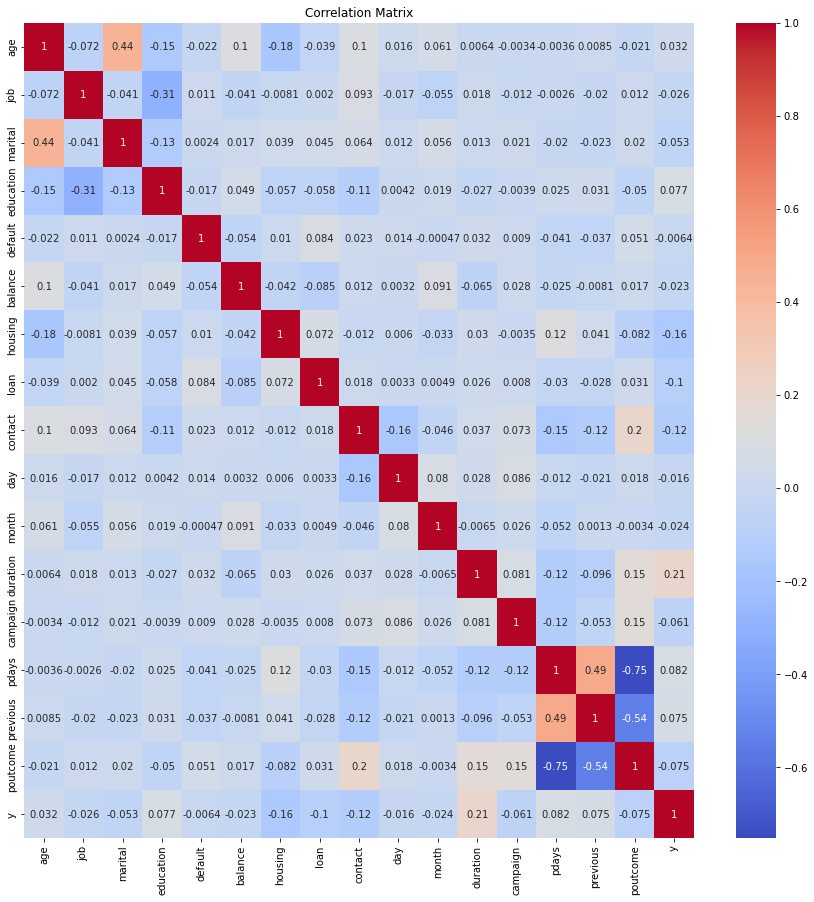

In [21]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(dataCorrelation, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix')
plt.show()

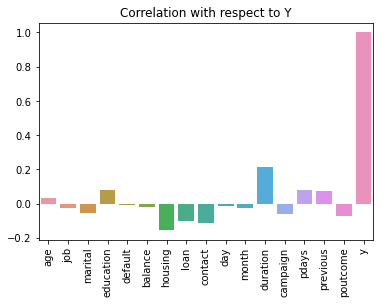

In [22]:
corr_with_col = mappedData.corrwith(data['y'])

# Create a barplot of the correlation values
sns.barplot(x=corr_with_col.index, y=corr_with_col.values)
plt.xticks(rotation=90)
plt.title('Correlation with respect to Y')
plt.show()

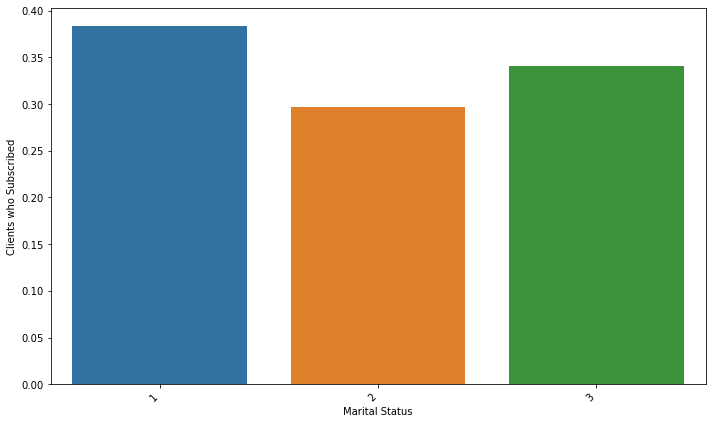

In [23]:

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="marital", y="y", data=mappedData, ci=None)
ax.set_xlabel("Marital Status")
ax.set_ylabel("Clients who Subscribed")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### The above graph shows the proportion of clients who have subscribed to term deposit, based on the marital status. Single people have mostly subscribed to term deposit according to above chart.

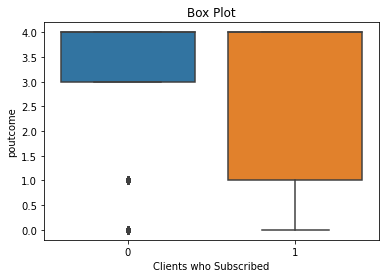

In [25]:
sns.boxplot(x='y', y='poutcome', data=mappedData)

# Set the title and axis labels
plt.title('Box Plot')
plt.xlabel('Clients who Subscribed')
plt.ylabel('poutcome')

# Show the plot
plt.show()


#### The box plot displays the distribution of the outcome variable for both customers who signed up for a term deposit (where "y" is equal to "yes") and clients who did not (where "y" is equal to "no"). The box plot displays the distribution's interquartile range (IQR), which includes the center 50% of the data. The whiskers stretch to the minimum and maximum values within 1.5 times the IQR of the distribution, while the line inside the box denotes the distribution's median. Any numbers outside of the whiskers are plotted as separate points as outliers.

### Task 4: Determine Six most influential attributes on target attribute (with explanation). You do not necessarily need to drop the remaining features for the Decision Tree Classifier. Your task is just to determine and show the Six most influential attributes with detailed explanation

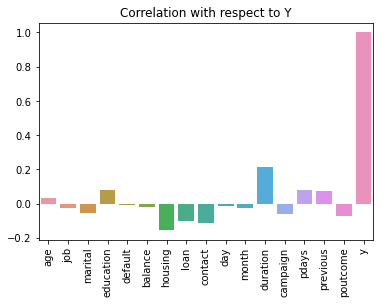

In [26]:
corr_with_col = mappedData.corrwith(data['y'])

# Create a barplot of the correlation values
sns.barplot(x=corr_with_col.index, y=corr_with_col.values)
plt.xticks(rotation=90)
plt.title('Correlation with respect to Y')
plt.show()

#### Above is the plot for correlation of attributes with respect to target attribute. From graph its clear that the 6 most influential parameters are duration, contact, housing, loan, previous and poutcome. we can come to this conclusion because the correlation of these parameters with respect to the target parameter is high.

### Task 5: Split your dataset 75% for training, and 25% for testing the classifier

In [27]:

featureSetColumn = ['duration', 'contact', 'housing', 'loan', 'previous', 'poutcome']
featureSet = mappedData.drop(columns=[col for col in mappedData.columns if col not in featureSetColumn], axis=1)
targetSet = mappedData['y']
X_trainSet, X_testSet, y_trainSet, y_testSet = train_test_split(featureSet, targetSet, test_size=0.25, random_state=42)

### Task 6: Use gini and entropy (play around with max_depth and min_samples_leaf parameters) to measure the quality of a split.

In [34]:
# Train a decision tree on the training data using the Gini impurity criterion
tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42,max_depth=4, min_samples_leaf=8)
tree_gini.fit(X_trainSet, y_trainSet)

# Train a decision tree on the training data using the entropy criterion
tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=4, min_samples_leaf=8)
tree_entropy.fit(X_trainSet, y_trainSet)

# Use the trained models to predict the test data
y_pred_gini = tree_gini.predict(X_testSet)
y_pred_entropy = tree_entropy.predict(X_testSet)

# Calculate the accuracy of the predictions
accuracy_gini = accuracy_score(y_testSet, y_pred_gini)
accuracy_entropy = accuracy_score(y_testSet, y_pred_entropy)

# Print the accuracy and the name of the criterion used
print("Accuracy using Gini impurity:", accuracy_gini)
print("Accuracy using entropy:", accuracy_entropy)

Accuracy using Gini impurity: 0.7146417445482866
Accuracy using entropy: 0.6931464174454829


In [33]:
# Train a decision tree on the training data using the Gini impurity criterion
tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42,max_depth=5, min_samples_leaf=10)
tree_gini.fit(X_trainSet, y_trainSet)

# Train a decision tree on the training data using the entropy criterion
tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=5, min_samples_leaf=10)
tree_entropy.fit(X_trainSet, y_trainSet)

# Use the trained models to predict the test data
y_pred_gini = tree_gini.predict(X_testSet)
y_pred_entropy = tree_entropy.predict(X_testSet)

# Calculate the accuracy of the predictions
accuracy_gini = accuracy_score(y_testSet, y_pred_gini)
accuracy_entropy = accuracy_score(y_testSet, y_pred_entropy)

# Print the accuracy and the name of the criterion used
print("Accuracy using Gini impurity:", accuracy_gini)
print("Accuracy using entropy:", accuracy_entropy)

Accuracy using Gini impurity: 0.7221183800623053
Accuracy using entropy: 0.7165109034267912


In [37]:
# Train a decision tree on the training data using the Gini impurity criterion
tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42,max_depth=8, min_samples_leaf=12)
tree_gini.fit(X_trainSet, y_trainSet)

# Train a decision tree on the training data using the entropy criterion
tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=8, min_samples_leaf=12)
tree_entropy.fit(X_trainSet, y_trainSet)

# Use the trained models to predict the test data
y_pred_gini = tree_gini.predict(X_testSet)
y_pred_entropy = tree_entropy.predict(X_testSet)

# Calculate the accuracy of the predictions
accuracy_gini = accuracy_score(y_testSet, y_pred_gini)
accuracy_entropy = accuracy_score(y_testSet, y_pred_entropy)

# Print the accuracy and the name of the criterion used
print("Accuracy using Gini impurity:", accuracy_gini)
print("Accuracy using entropy:", accuracy_entropy)

Accuracy using Gini impurity: 0.7190031152647975
Accuracy using entropy: 0.7183800623052959


### Task 7: Use comments to explain your code and variable names

#### Using the Gini impurity criterion and the entropy criterion, respectively, this code first constructs two decision tree classifiers. The DecisionTreeClassifier class's criteria parameter is set to either "gini" or "entropy" to specify the criterion to be used.

#### The code then utilizes the trained models to forecast the target variable for the test data using the predict method after fitting the two decision trees to the training data using the fit technique. The accuracy of the predictions is determined using the scikit-learn accuracy score function.

#### The code then outputs the prediction accuracy for each criterion. The accuracy metric, which gauges the percentage of instances in the test set that were properly predicted, can be used to assess how well the two models performed.

### Task 8: Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support) for both criteria

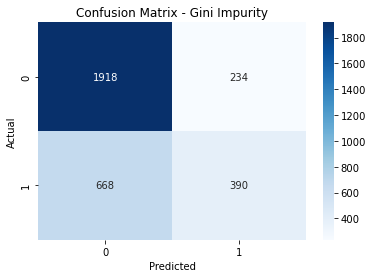

Classification Report - Gini Impurity:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81      2152
           1       0.62      0.37      0.46      1058

    accuracy                           0.72      3210
   macro avg       0.68      0.63      0.64      3210
weighted avg       0.70      0.72      0.70      3210



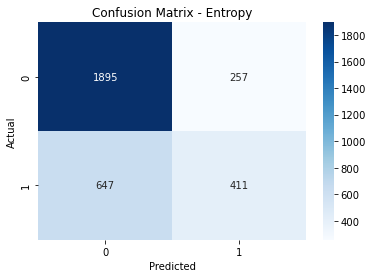

Classification Report - Entropy:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81      2152
           1       0.62      0.39      0.48      1058

    accuracy                           0.72      3210
   macro avg       0.68      0.63      0.64      3210
weighted avg       0.70      0.72      0.70      3210



In [38]:
# Print the confusion matrix for the decision tree using Gini impurity
cm_gini = confusion_matrix(y_testSet, y_pred_gini)

sns.heatmap(cm_gini, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gini Impurity')
plt.show()

# Print the classification report for the decision tree using Gini impurity
report_gini = classification_report(y_testSet, y_pred_gini)
print("Classification Report - Gini Impurity:\n", report_gini)

# Print the confusion matrix for the decision tree using entropy
cm_entropy = confusion_matrix(y_testSet, y_pred_entropy)
sns.heatmap(cm_entropy, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Entropy')
plt.show()


# Print the classification report for the decision tree using entropy
report_entropy = classification_report(y_testSet, y_pred_entropy)
print("Classification Report - Entropy:\n", report_entropy)


### Task 9: Compare the results of the classifier using gini and entropy

### The confusion matrices display the number of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions for each model. The heatmaps show that both models perform similarly in terms of overall accuracy, with the Gini model making somewhat more accurate predictions. 
### Both cases, class 0's precision is 0.72, class 1's is 0.48, and class 1's recall is 0.38. In both reports, the F1-score for class 0 is 0.76, and in both cases, the F1-score for class 1 is 0.42. With an accuracy of 0.66 and a macro average F1-score of 0.59, the overall accuracy, macro average, and weighted average metrics are also equal across the two reports.

### The recall for class 0 is the sole significant variation between the two reports, and it is somewhat greater in the entropy report (0.80) than in the Gini impurity report (0.79).

### Overall, the two classification reports' findings are fairly similar, indicating that both the Gini impurity and entropy criteria can result in classification models that are on par with one another. Nonetheless, depending on the features of the dataset and the particular issue being tackled, one criterion could occasionally be more useful than the other.


### Task 10: Print the decision tree visualization with depth of 5 

In [39]:
decisionTree = DecisionTreeClassifier(max_depth = 5, 
                             random_state = 0)
decisionTree.fit(X_trainSet, y_trainSet)
decisionTree.predict(X_testSet)

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

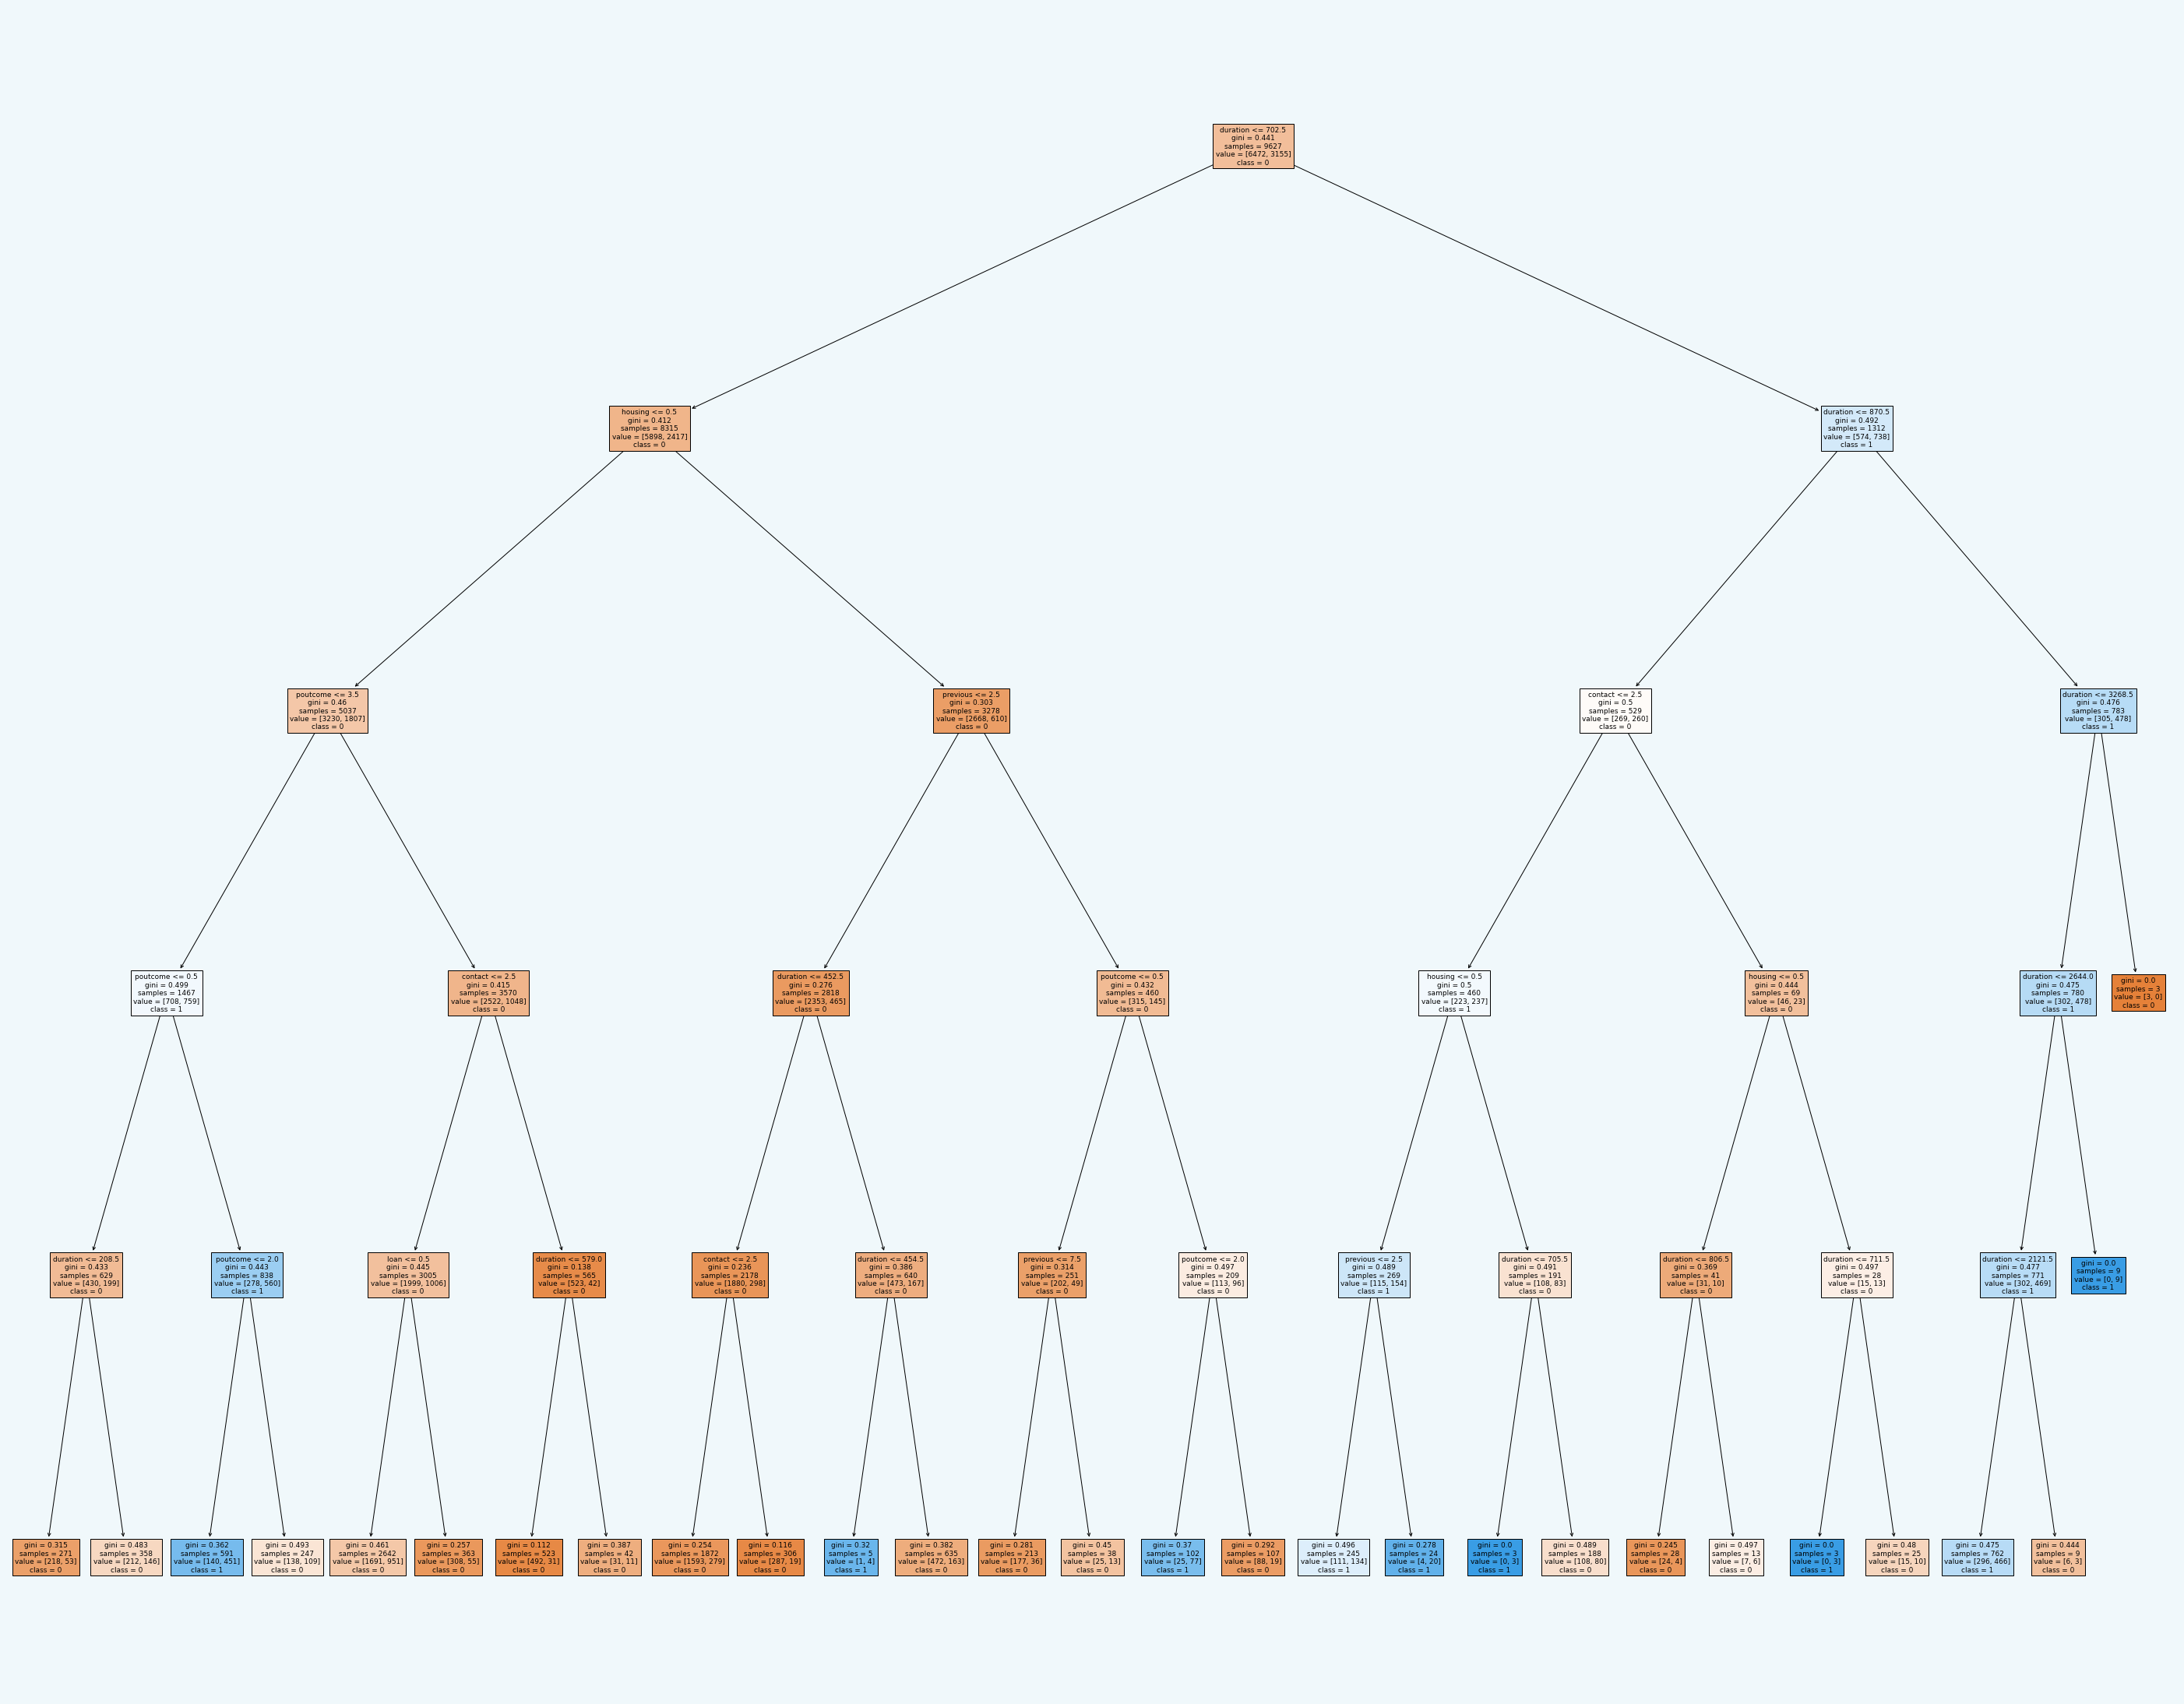

In [40]:
#Decision tree visualization

dst_figure = plt.figure(figsize=(50,40))
dst_figure.patch.set_facecolor('#f0f8fb')
_ = tree.plot_tree(decisionTree,
                   feature_names=featureSet.columns,
                   class_names=['0', '1'],
                   filled=True)

### Reference
#### https://towardsdatascience.com/3-approaches-to-find-missing-values-ff656eba6902

#### https://www.w3schools.com/python/pandas/pandas_cleaning_empty_cells.asp

#### https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc